In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [84]:
from utils import Dataset
from DataGeneration import SyntheticChangepointData
from Models import KolmogorovSmirnovModel

In [4]:
%load_ext autoreload
%autoreload 2

Notes:

- Способ проверять качество моделей: предположить модель генерации данных, затем как либо проверить, мол да, данные распределены таким образом. Затем нагенерить временных рядов с такой разладкой и на этом тестировать алгоритмы

- построить графиков
- отображать changepoint на графиках

есть одномерные, есть двумерные ряды

разрывов в данных нету

In [85]:
data = Dataset(1)
model = KolmogorovSmirnovModel()

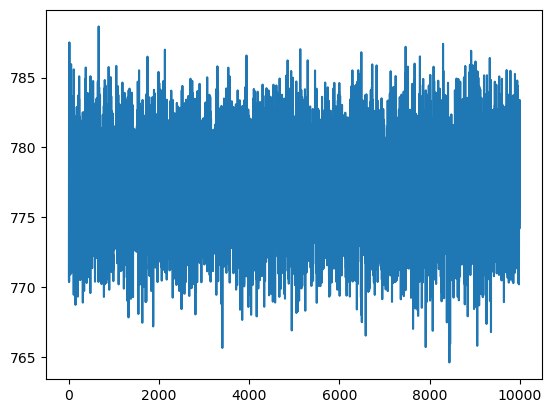

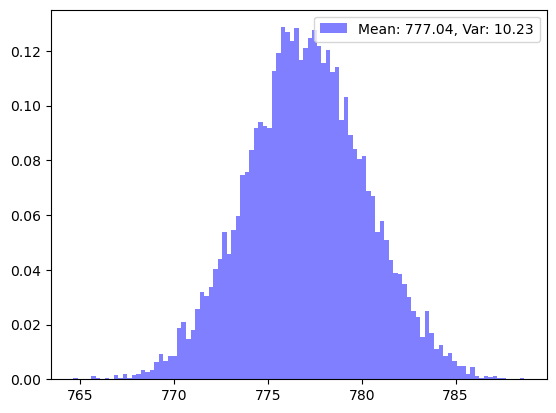

In [86]:
data.sample_plots(35)

In [92]:
cps = []
uncertainties = []
probs_arr = []
for ts in tqdm(data):
    cp, uncertainty, probs = model.find_cp(ts)
    cps.append(cp)
    uncertainties.append(uncertainty)
    probs_arr.append(probs)

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [10:50<00:00, 16.27s/it]


In [90]:
cps

[6864,
 5430,
 10001,
 2152,
 5131,
 9355,
 10001,
 8412,
 4188,
 3315,
 6083,
 10001,
 10001,
 4268,
 9969,
 10001,
 10001,
 6647,
 4327,
 5249,
 4317,
 8216,
 9794,
 4493,
 5449,
 8512,
 9634,
 10001,
 3647,
 10001,
 6632,
 10001,
 10001,
 7841,
 1985,
 318,
 9466,
 10001,
 10001,
 7412]

In [93]:
uncertainties

[5502,
 3075,
 10,
 9507,
 6325,
 1470,
 10,
 2457,
 1646,
 2902,
 5115,
 10,
 10,
 3201,
 252,
 10,
 10,
 1836,
 7039,
 1577,
 5436,
 3451,
 705,
 2642,
 2531,
 6520,
 597,
 10,
 4743,
 10,
 3321,
 10,
 10,
 2243,
 1972,
 604,
 6668,
 10,
 10,
 5344]

In [101]:
data = Dataset(4)

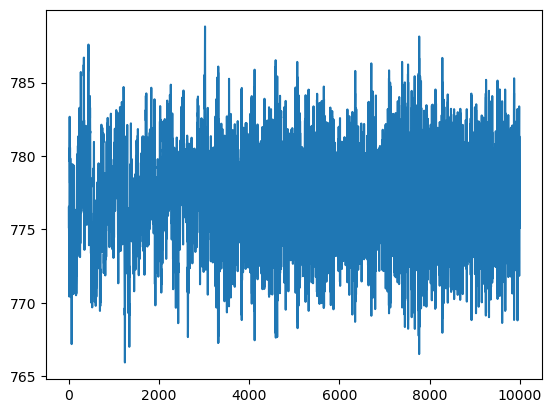

Matrix of p-values for the hypothesis that pairs of segments have the same distribution:
[[0.00000000e+00 9.18569009e-03 4.05406459e-01 9.68520061e-02]
 [9.18569009e-03 0.00000000e+00 1.18905246e-01 1.65347578e-05]
 [4.05406459e-01 1.18905246e-01 0.00000000e+00 3.48714287e-03]
 [9.68520061e-02 1.65347578e-05 3.48714287e-03 0.00000000e+00]]


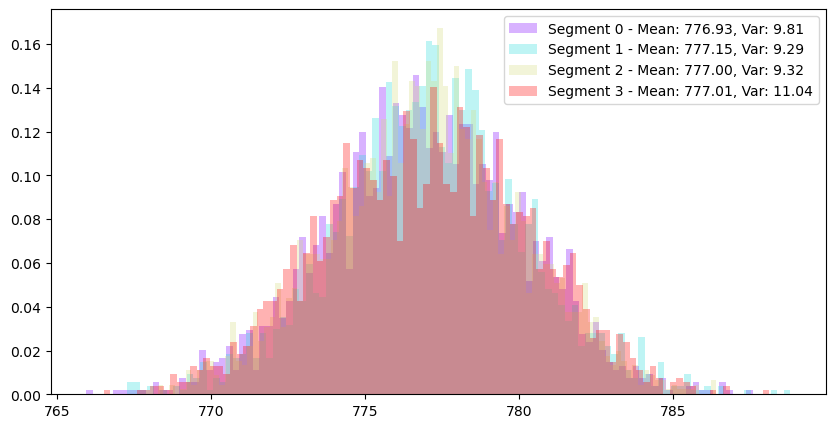

In [107]:
data.sample_plots(1, changepoints=[2500, 5000, 7500])

In [60]:
test_ts = data[0]

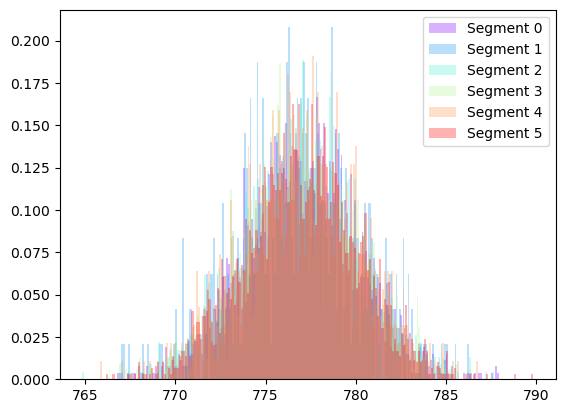

In [83]:
test_ts.plot_distribution(changepoints=[2500, 3000, 5000 , 6600, 7500], bins=200)

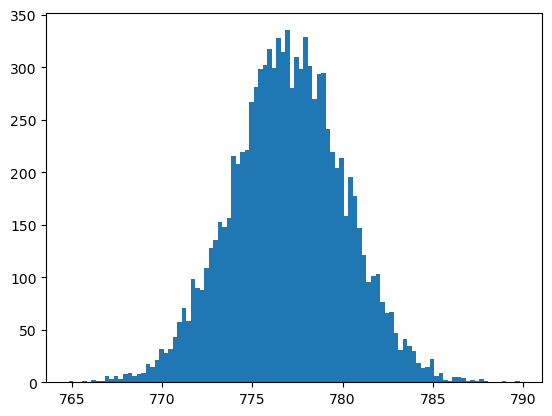

In [73]:
plt.hist(test_ts.ts, bins=100)

plt.show()

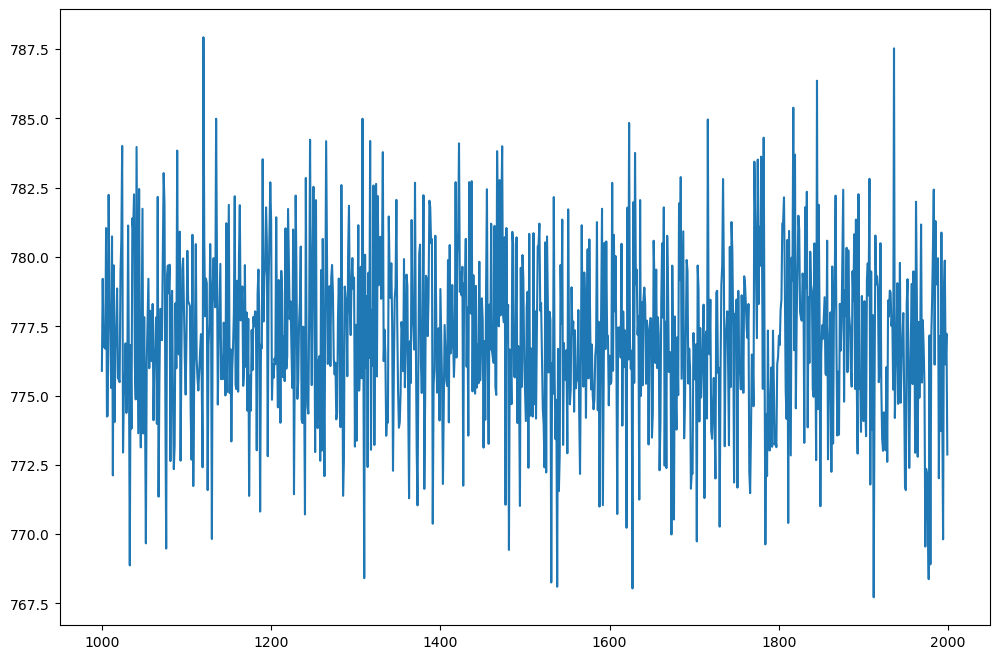

In [108]:
plt.figure(figsize=(12, 8))

test_ts.plot([1000, 2000])

In [54]:
for ts in data:
    print(ts)


        Dataser number: 1
        TS number: 0
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 1
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 2
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 3
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 4
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 5
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 6
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 7
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 8
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
        TS number: 9
        TS len: 10000
        TS dim: 1
        

        Dataser number: 1
   

In [7]:
[0][-1]

0

In [17]:
timespan = 10000
lambda_param = 1/timespan
changepoint_prior = expon(scale=1/lambda_param)
params_prior = [norm(loc=0, scale=10), norm(loc=30, scale=15)] # задаю prior на среднее, и prior на дисперсию

def ts_gen_distribution(mean, std_dev, size):
    return norm(loc=mean, scale=std_dev).rvs(size=size).reshape(-1,1)

synthetic_data_generator = SyntheticChangepointData(changepoint_prior, params_prior, ts_gen_distribution, timespan)
time_series_data = synthetic_data_generator.generate_data()

print("Generated synthetic time series data of length", len(time_series_data))

Generated segments : [0, 3476, 10000]
Generated synthetic time series data of length 10000


In [18]:
time_series_data


        Dataser number: Synthetic
        TS number: None
        TS len: 10000
        TS dim: 1
        True cps: [3476]

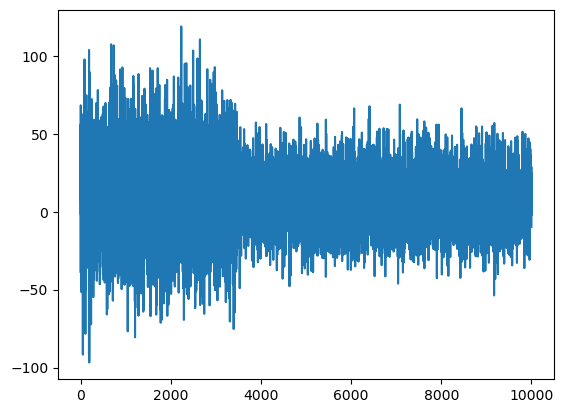

In [19]:
time_series_data.plot()

In [11]:
simple_cp_detector = MaxLikelyhoodModel()

In [21]:
type(time_series_data)

DataGeneration.SyntheticTimeSeries

In [22]:
len(time_series_data)

10000

In [46]:
from scipy.stats import kstest, norm
import numpy as np
import matplotlib.pyplot as plt

In [41]:
cp, max_prob, probs = simple_cp_detector.find_cp(time_series_data)

  0%|          | 0/9997 [00:00<?, ?it/s]

100%|██████████| 9997/9997 [01:27<00:00, 114.86it/s]


In [45]:
time_series_data


        Dataser number: Synthetic
        TS number: None
        TS len: 10000
        TS dim: 1
        True cps: [3476]

In [44]:
cp

3468

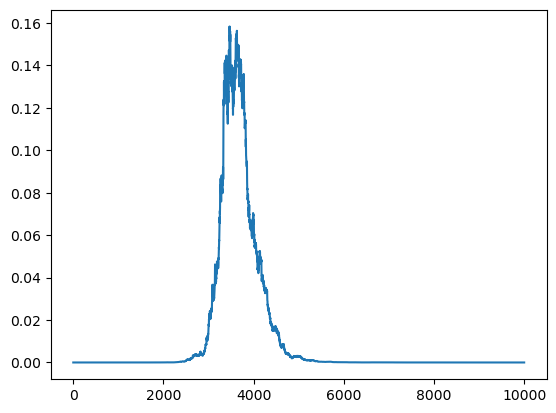

In [47]:
plt.plot(probs)

In [43]:
probs

[1.9493533854663597e-07,
 1.7269850576195728e-07,
 1.8219377841664615e-07,
 2.04193801740779e-07,
 1.9317524724480925e-07,
 2.3640978776045478e-07,
 2.2027249453055044e-07,
 2.468935741328654e-07,
 2.309096121494756e-07,
 2.3529004121247965e-07,
 2.390424523891422e-07,
 2.4883972102543957e-07,
 2.500743632615533e-07,
 2.4781599454009963e-07,
 2.426805450248611e-07,
 2.509964421057293e-07,
 2.56117911076035e-07,
 2.448818853108102e-07,
 2.414327541311511e-07,
 2.411144384261014e-07,
 2.2773842512280864e-07,
 1.9740105510934946e-07,
 2.244703429336254e-07,
 2.365750445555982e-07,
 2.1439853881060066e-07,
 2.104424449358946e-07,
 2.279560348984827e-07,
 2.299111621539751e-07,
 2.102674972860395e-07,
 2.2648720702392205e-07,
 2.2677639650083248e-07,
 2.430188805880166e-07,
 2.4554509826071905e-07,
 2.3476019272345029e-07,
 2.3158984308604688e-07,
 2.3350055512082686e-07,
 2.4542983002532323e-07,
 2.5317238898942047e-07,
 2.478778216545424e-07,
 2.494793622559809e-07,
 2.5157124690368377e-0

In [78]:
timespan = 10000
lambda_param = 1/timespan
changepoint_prior = expon(scale=1/lambda_param)
params_prior = [norm(loc=0, scale=0), norm(loc=10, scale=0.1)] # задаю prior на среднее, и prior на дисперсию

def ts_gen_distribution(mean, std_dev, size):
    return norm(loc=mean, scale=std_dev).rvs(size=size).reshape(-1,1)

synthetic_data_generator = SyntheticChangepointData(changepoint_prior, params_prior, ts_gen_distribution, timespan)
time_series_data2 = synthetic_data_generator.generate_data()

print("Generated synthetic time series data of length", len(time_series_data2))

Generated segments : [0, 10000]
Generated synthetic time series data of length 10000


In [79]:
time_series_data2


        Dataser number: Synthetic
        TS number: None
        TS len: 10000
        TS dim: 1
        True cps: []

In [80]:
cp, uncertainty, probs = simple_cp_detector.find_cp(time_series_data2)

  0%|          | 0/9990 [00:00<?, ?it/s]

100%|█████████▉| 9980/9990 [00:16<00:00, 488.12it/s]/home/andrey/Prgrm/Bayes2sem/Models.py:50: RuntimeWarning: invalid value encountered in divide
  norm_sample = (sample - mean)/std
100%|██████████| 9990/9990 [00:16<00:00, 605.47it/s]


In [75]:
cp

6199

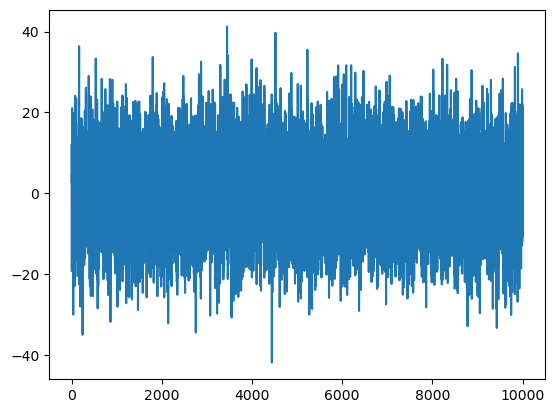

In [76]:
time_series_data2.plot()

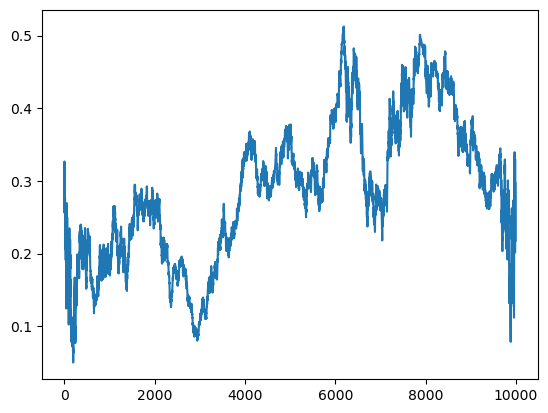

In [77]:
plt.plot(probs)

In [26]:
timespan = 10000
lambda_param = 1/timespan
changepoint_prior = expon(scale=1/lambda_param)
params_prior = [norm(loc=0, scale=1), norm(loc=5, scale=1)] # задаю prior на среднее, и prior на дисперсию

def ts_gen_distribution(mean, std_dev, size):
    return norm(loc=mean, scale=std_dev).rvs(size=size).reshape(-1,1)

synthetic_data_generator = SyntheticChangepointData(changepoint_prior, params_prior, ts_gen_distribution, timespan)
time_series_data3 = synthetic_data_generator.generate_data()

print("Generated synthetic time series data of length", len(time_series_data3))

Generated segments : [0, 10000]
Generated synthetic time series data of length 10000


In [27]:
time_series_data3


        Dataser number: Synthetic
        TS number: None
        TS len: 10000
        TS dim: 1
        True cps: []

In [36]:
cp, uncertainty, probs = simple_cp_detector.find_cp(time_series_data3)

100%|█████████▉| 9961/9990 [00:15<00:00, 569.85it/s]/home/andrey/Prgrm/Bayes2sem/Models.py:50: RuntimeWarning: invalid value encountered in divide
  norm_sample = (sample - mean)/std
100%|██████████| 9990/9990 [00:15<00:00, 635.57it/s]


In [37]:
cp

10001

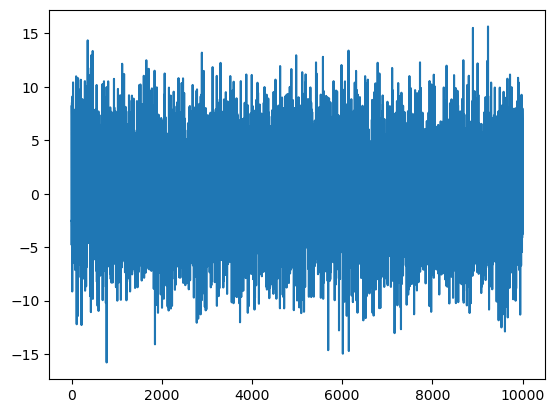

In [38]:
time_series_data3.plot()

In [34]:
probs[-5:]

[0.8304397929924892,
 0.7757992675857297,
 0.984315949542717,
 0.9320829892713549,
 nan]

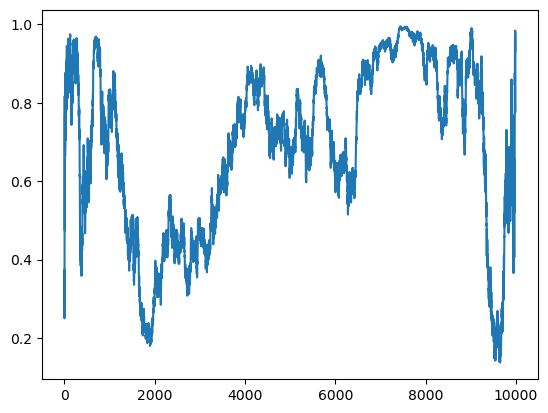

In [39]:
plt.plot(probs)